In [72]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import auc as auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve

In [61]:
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    return (mpatches.Patch(color=color), label)

In [62]:
fold_data = []
agg_scores_by_patient = {}
labels_by_patient = {}
patients_by_fold = []
for fold in range(6):
    fold_data.append([])    
    patients_by_fold.append([])
    for file in glob.glob(f'/home/colin/results_cov/*fold_{fold}.json'):
        with open(file) as fp:
            data = json.load(fp)
        fold_data[-1].append(data)
        for patient in data.keys():
            if patient not in agg_scores_by_patient:
                agg_scores_by_patient[patient] = []
                labels_by_patient[patient] = data[patient]['label']
                patients_by_fold[-1].append(patient)
            agg_scores_by_patient[patient].append(np.median(data[patient]['predictions']))

In [ ]:
plt.se

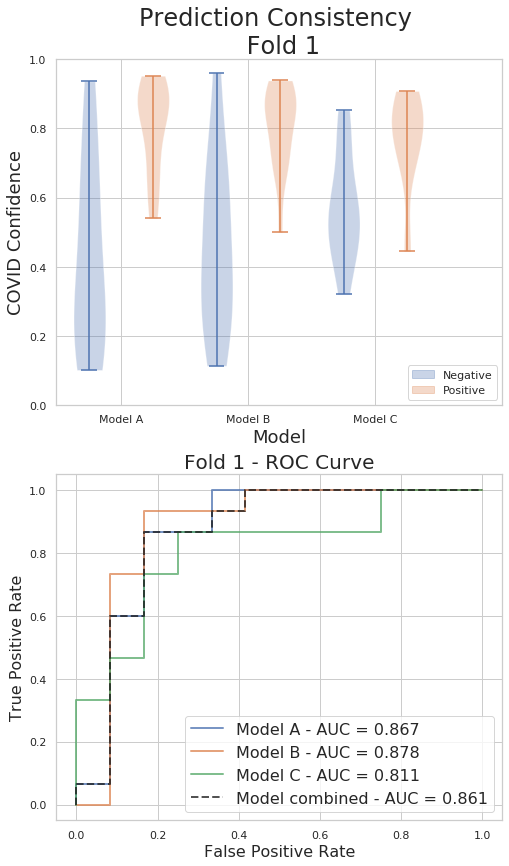

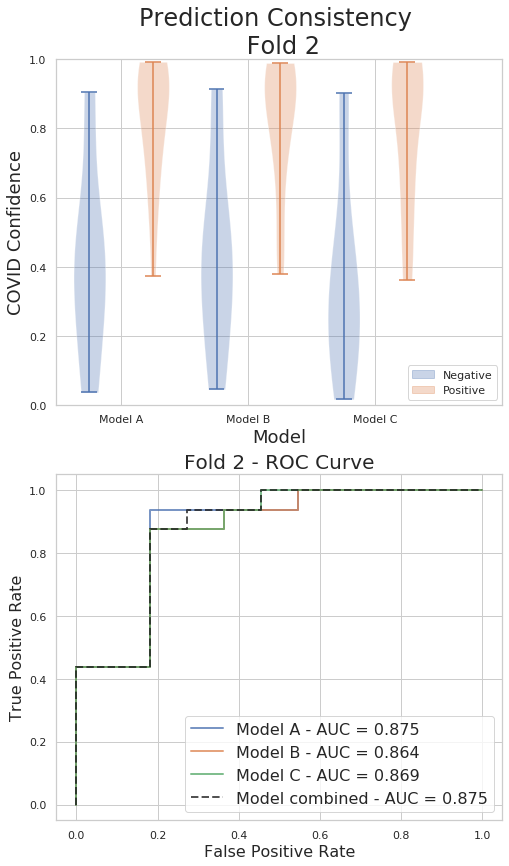

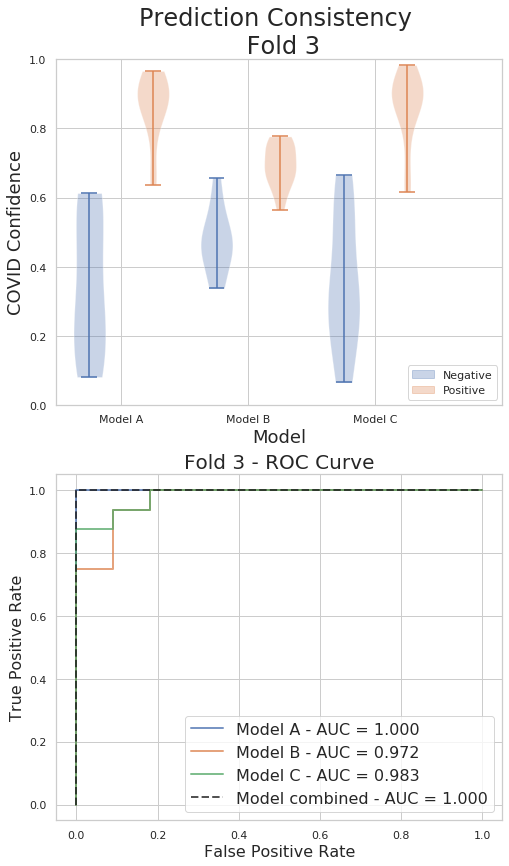

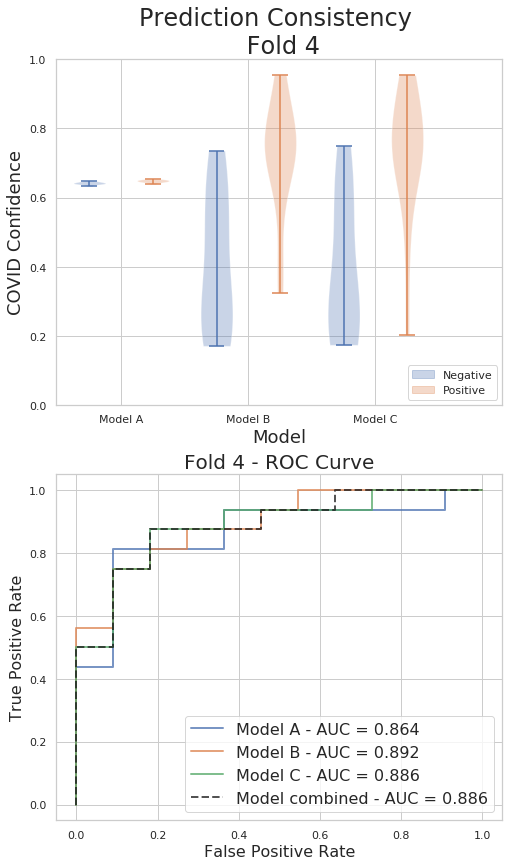

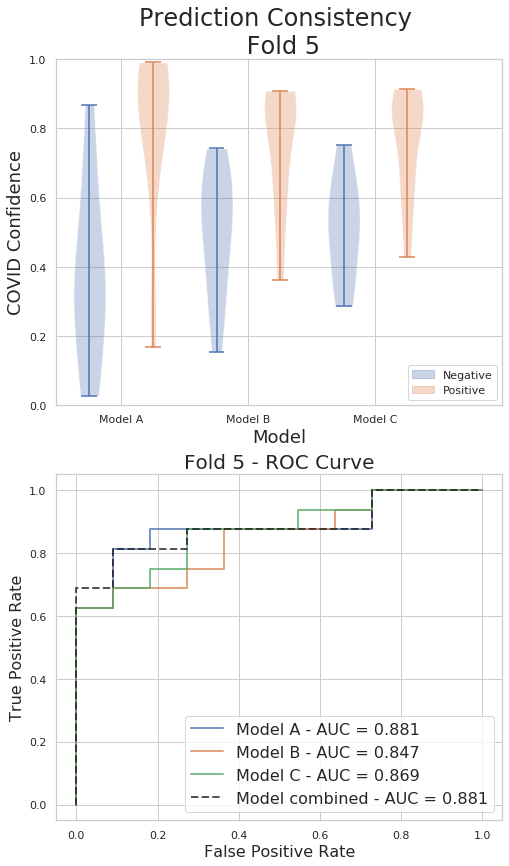

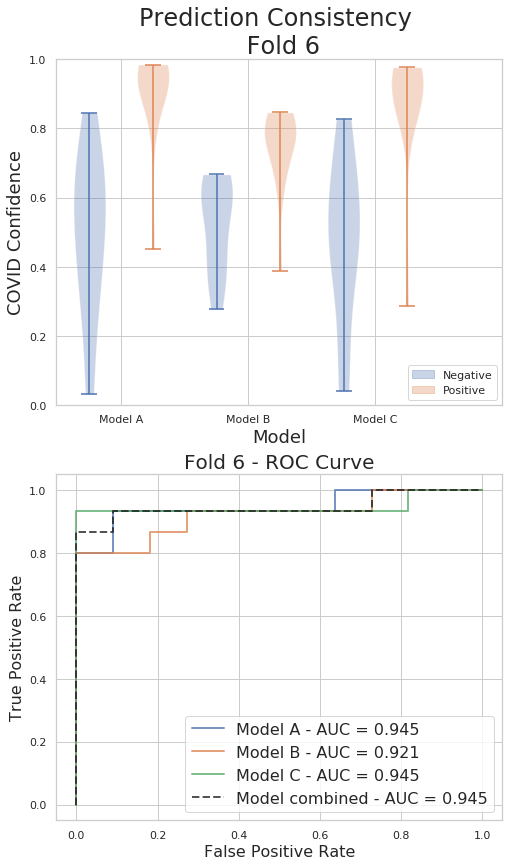

In [110]:
sns.set(style='whitegrid')
for fold_number in range(6):
    pos_stds = []
    neg_stds = []
    neg_means = []
    pos_means = []
    for patient in patients_by_fold[fold_number]:
        preds = agg_scores_by_patient[patient]
        if labels_by_patient[patient] == 0:
            neg_stds.append(np.std(preds))
            neg_means.append(preds)
        else:
            pos_stds.append(np.std(preds))
            pos_means.append(preds)
    pos_means = np.array(pos_means)
    neg_means = np.array(neg_means)
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 14))
    vio_n = axs[0].violinplot(neg_means, positions=np.arange(0,6, 2))
    vio_p = axs[0].violinplot(pos_means, positions=np.arange(1,7, 2))
    labels = [add_label(vio_n, "Negative"), add_label(vio_p, 'Positive')]
    x_data = np.arange(0, 7, 2) + 0.5
    axs[0].set_xticks(x_data)
    axs[0].set_xticklabels(labels=['Model A', 'Model B', 'Model C'])
    axs[0].legend(*zip(*labels), loc=4)
    axs[0].set_ylabel("COVID Confidence", fontsize=18)
    axs[0].set_xlabel("Model", fontsize=18)
    axs[0].set_title(f"Prediction Consistency \n Fold {fold_number + 1}", fontsize=24)
#     plt.gca().xaxis.grid(False)
    axs[0].set_ylim([0,1])
    labels = [1]*len(pos_means) + [0]*len(neg_means)
    y_pred = np.concatenate([pos_means, neg_means], axis=0)
    for model_ind, model_name in enumerate(['A','B','C']):
        fprs, tprs,threshs =  roc_curve(labels, y_pred[:,model_ind])
        auc = auc_score(fprs, tprs)
        axs[1].plot(fprs, tprs, label=f'Model {model_name} - AUC = {auc:.3f}', linewidth=2, alpha=0.75)
    median_y = np.mean(y_pred, axis=-1)
    fprs, tprs,threshs =  roc_curve(labels, median_y)
    auc = auc_score(fprs, tprs)
    axs[1].plot(fprs, tprs, label=f'Model combined - AUC = {auc:.3f}', linewidth=2, alpha=0.75, linestyle='dashed', color='k')
    axs[1].set_ylabel("True Positive Rate", fontsize=16)
    axs[1].set_xlabel("False Positive Rate", fontsize=16)
    axs[1].set_title(f"Fold {fold_number + 1} - ROC Curve", fontsize=20)
    axs[1].legend(fontsize=16)
    plt.show()

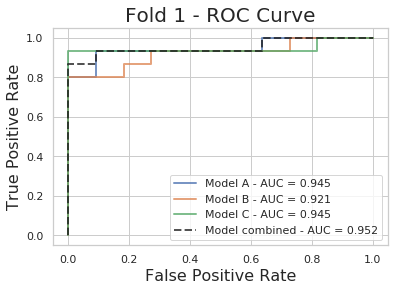

In [100]:
labels = [1]*len(pos_means) + [0]*len(neg_means)
y_pred = np.concatenate([pos_means, neg_means], axis=0)
for model_ind, model_name in enumerate(['A','B','C']):
    fprs, tprs,threshs =  roc_curve(labels, y_pred[:,model_ind])
    auc = auc_score(fprs, tprs)
    plt.plot(fprs, tprs, label=f'Model {model_name} - AUC = {auc:.3f}', linewidth=2, alpha=0.75)
median_y = np.median(y_pred, axis=-1)
fprs, tprs,threshs =  roc_curve(labels, median_y)
auc = auc_score(fprs, tprs)
plt.plot(fprs, tprs, label=f'Model combined - AUC = {auc:.3f}', linewidth=2, alpha=0.75, linestyle='dashed', color='k')
plt.ylabel("True Positive Rate", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=16)
plt.title("Fold 1 - ROC Curve", fontsize=20)
plt.legend()

0.9454545454545454

In [78]:
y_pred.shape

(26, 3)

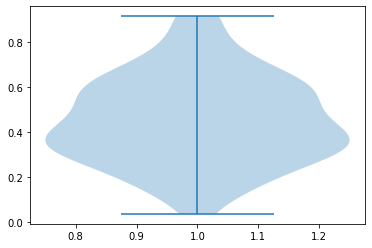

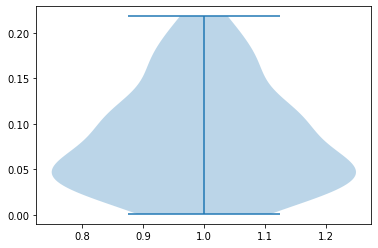

In [16]:
plt.violinplot(neg_means)
plt.show()
plt.violinplot(neg_stds)
plt.show()


0.05608828627430138

In [14]:
np.mean(pos_means)

0.7844645971471959